In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error


In [9]:
X = load_boston().data
Y = load_boston().target

In [10]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)

(339, 13)
(167, 13)


In [12]:
clf = SGDRegressor()
clf.fit(X_train, Y_train)
print(mean_squared_error(Y_test, clf.predict(X_test)))
print(clf.coef_)

23.262754364750197
[-0.94316587  0.53622042 -0.05623583  0.90546009 -0.79052589  3.20218494
 -0.34347946 -1.82730536  0.45475754 -0.0460234  -1.96112703  1.08991573
 -3.58009264]


## Implementing SGD with a function 

In [55]:
from sklearn.utils import resample
def predict(weight,intercept,dataset_X,dataset_Y,learning_rate,resampled_index_X):

    derivative_w = np.zeros(dataset_X[0].reshape(1,-1).T.shape)
    derivative_b = np.array([0])
    for index in resampled_index_X:
        x_sgd = dataset_X[index].reshape([1,-1]).T
        #print("X",c.shape)
        wdotx_sgd = weight.T.dot(x_sgd)+intercept.reshape([1,1])
        #print("W^t.X-W0",b.shape)
        del_sgd = dataset_Y[index].reshape([1,1])-wdotx_sgd
        #print("Y-W^x-W0",e.shape)
        x_dot_del_sgd = 2*dataset_X[index].reshape([1,-1]).T.dot(del_sgd)
        #print("2*X(Y-W^x-W0)",a.shape)
        derivative_w = derivative_w - x_dot_del_sgd
        #print("deribative_w",derivative_w.shape)
        t = 2*del_sgd
        derivative_b = derivative_b - t
        #print("derivative_b",derivative_b.shape)
    return weight - learning_rate*derivative_w/dataset_X.shape[0],intercept-learning_rate*derivative_b/dataset_X.shape[0]
    

In [56]:
# Predictor of output with given weight and intercept
def output(input,weight,intercept):
    return weight.T.dot(input.reshape([13,1]))+intercept

## With initial learning rate as 1

In [53]:
resampled_index_X = np.random.choice(X_train.shape[0],X_train.shape[0],replace=False)
weight = np.random.normal(0,1,size=(len(X_train[0]),1))
intercept = np.array([np.random.rand()])
learning_rate = 1
for i in range(50):
    learning_rate = learning_rate/2
    weight,intercept = predict(weight,intercept,X_train,Y_train,learning_rate,resampled_index_X)
    print(i,weight,intercept)



0 [[-3.27958149]
 [ 2.57494708]
 [-2.33110118]
 [ 2.6368343 ]
 [-2.30277892]
 [ 6.49522621]
 [-2.00796476]
 [-0.9029119 ]
 [-1.26178855]
 [-2.09769165]
 [-5.85473758]
 [ 2.71142493]
 [-5.71955056]] [[22.73579307]]
1 [[ 1.58773935]
 [-2.94960109]
 [ 4.88211029]
 [ 1.38309921]
 [ 4.24006905]
 [ 0.90105702]
 [ 3.879805  ]
 [-7.19960633]
 [ 5.43771887]
 [ 4.84835053]
 [ 0.20046093]
 [-1.23370118]
 [ 1.1027143 ]] [[22.2503935]]
2 [[-2.95756328]
 [ 2.60371886]
 [-2.63497576]
 [ 1.0118711 ]
 [-3.37140068]
 [ 5.04033407]
 [-2.75666634]
 [-0.10757911]
 [-1.19335673]
 [-2.17847942]
 [-4.1388714 ]
 [ 2.57298644]
 [-5.34810904]] [[22.36212742]]
3 [[-1.77462789]
 [ 1.16302317]
 [-0.74077615]
 [ 1.01792226]
 [-1.54223685]
 [ 3.87824285]
 [-1.11194105]
 [-1.88268102]
 [ 0.48046318]
 [-0.43744309]
 [-2.89159789]
 [ 1.59967887]
 [-3.7288173 ]] [[22.3331639]]
4 [[-1.62175572]
 [ 0.97772469]
 [-0.50745304]
 [ 1.00578102]
 [-1.33494466]
 [ 3.71480005]
 [-0.91369403]
 [-2.10111748]
 [ 0.68602414]
 [-0.2314

In [63]:
#we found convreged weight and intercept as 
weight = np.array([[-1.53396094],
 [ 0.87196159],
 [-0.37925018],
 [ 0.99323706],
 [-1.23079877],
 [ 3.61491963],
 [-0.80683925],
 [-2.22151736],
 [ 0.79841027],
 [-0.12349975],
 [-2.59921242],
 [ 1.40858412],
 [-3.43248814]])
intercept = np.array( [[22.33134153]] )

In [64]:
predicted_y = [output(X_test[index],weight,intercept)[0][0] for index in range(X_test.shape[0])]

print(mean_squared_error(Y_test, predicted_y))

27.37862649603059


## With initial learning rate as 0.1

In [60]:
resampled_index_X = np.random.choice(X_train.shape[0],X_train.shape[0],replace=False)
weight = np.random.normal(0,1,size=(len(X_train[0]),1))
intercept = np.array([np.random.rand()])
learning_rate = 0.1
for i in range(50):
    learning_rate = learning_rate/2
    weight,intercept = predict(weight,intercept,X_train,Y_train,learning_rate,resampled_index_X)
    print(i,weight,intercept)

0 [[-0.62251904]
 [ 0.15634624]
 [ 0.48625213]
 [ 0.10562106]
 [-0.03081061]
 [ 2.10166108]
 [-0.93846253]
 [ 2.44122737]
 [ 0.74916754]
 [-0.31597372]
 [-2.45403707]
 [-0.16505131]
 [ 0.62102243]] [[2.71743959]]
1 [[-0.70628474]
 [ 0.15651871]
 [ 0.45916785]
 [ 0.23484856]
 [-0.05080408]
 [ 2.32513125]
 [-0.92504917]
 [ 2.35358846]
 [ 0.69340878]
 [-0.37630021]
 [-2.59053841]
 [-0.05130937]
 [ 0.40411552]] [[3.71475169]]
2 [[-7.39549569e-01]
 [ 1.50414662e-01]
 [ 4.54641155e-01]
 [ 2.92940508e-01]
 [-5.33784185e-02]
 [ 2.42279295e+00]
 [-9.12332310e-01]
 [ 2.30442020e+00]
 [ 6.75612999e-01]
 [-3.96060170e-01]
 [-2.64609490e+00]
 [-2.34193055e-03]
 [ 3.09527283e-01]] [[4.18747778]]
3 [[-0.75457442]
 [ 0.14639618]
 [ 0.45384068]
 [ 0.32048665]
 [-0.05355634]
 [ 2.46873274]
 [-0.9051196 ]
 [ 2.27917897]
 [ 0.66848703]
 [-0.40412345]
 [-2.67134225]
 [ 0.02062548]
 [ 0.26490925]] [[4.417714]]
4 [[-0.7617338 ]
 [ 0.14419503]
 [ 0.45373816]
 [ 0.33390034]
 [-0.05343104]
 [ 2.49103885]
 [-0.9

In [61]:
#we found convreged weight and intercept as 
weight = np.array([[-0.76867366],
 [ 0.14188166],
 [ 0.45381251],
 [ 0.34708021],
 [-0.05318269],
 [ 2.51292209],
 [-0.89749969],
 [ 2.25366846],
 [ 0.66234571],
 [-0.41118107],
 [-2.69508179],
 [ 0.04270531],
 [ 0.22186217]])
intercept = np.array( [[4.64399194]])

In [62]:
predicted_y1 = [output(X_test[index],weight,intercept)[0][0] for index in range(X_test.shape[0])]

print(mean_squared_error(Y_test, predicted_y1))

353.33740187217427


## Scatter plot of y_test(actual) v/s y_test(predicted)

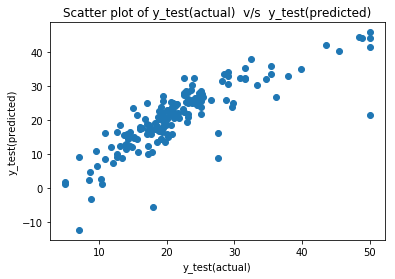

In [67]:
import matplotlib.pyplot as plt

plt.scatter(Y_test,predicted_y)
plt.title("Scatter plot of y_test(actual)  v/s  y_test(predicted)")
plt.xlabel("y_test(actual)")
plt.ylabel("y_test(predicted)")
plt.show();


# CONCLUSION : 

We used our own implementation SGD regressor and found following results :\n
    1) MSE of our SGD implementaion on test data: 27.37862649603059
       MSE of sklearn SGD regressor on test data: 23.262754364750197
    2) Weight vector and intercept found :
                                            weight =[[-1.53396094],
                                                     [ 0.87196159],
                                                     [-0.37925018],
                                                     [ 0.99323706],
                                                     [-1.23079877],
                                                     [ 3.61491963],
                                                     [-0.80683925],
                                                     [-2.22151736],
                                                     [ 0.79841027],
                                                     [-0.12349975],
                                                     [-2.59921242],
                                                     [ 1.40858412],
                                                     [-3.43248814]]
                                            intercept = [[22.33134153]]
                                            
    3)Scatter plot shows that the prediction made on test data is very close to actual data.